<a href="https://colab.research.google.com/github/dhruv0rathore/IRIS/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Step 1.1.1: Import Libraries and Load Dataset

import pandas as pd
from sklearn.datasets import load_iris

print("--- Step 1.1.1: Importing Libraries and Loading Iris Dataset ---")

iris = load_iris()

print("\nIris dataset loaded successfully as a 'Bunch' object.")
print(f"Type of loaded iris object: {type(iris)}")
print(f"Keys available in the iris object: {iris.keys()}")


--- Step 1.1.1: Importing Libraries and Loading Iris Dataset ---

Iris dataset loaded successfully as a 'Bunch' object.
Type of loaded iris object: <class 'sklearn.utils._bunch.Bunch'>
Keys available in the iris object: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [37]:
# Step 1.1.2: Convert to Pandas DataFrame


df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


df['species_id'] = iris.target


df['species_name'] = df['species_id'].map(lambda x: iris.target_names[x])

print("\nDataFrame 'df' created successfully.")


DataFrame 'df' created successfully.


In [38]:
# Step 1.1.3: Displaying the DataFrame and Initial Inspection

print("\n--- Displaying the first 5 rows of the DataFrame (df.head()) ---")
print(df.head())

print("\n--- DataFrame Information (df.info()) ---")
df.info()

print("\n--- Descriptive Statistics (df.describe()) ---")
print(df.describe())


--- Displaying the first 5 rows of the DataFrame (df.head()) ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_id species_name  
0           0       setosa  
1           0       setosa  
2           0       setosa  
3           0       setosa  
4           0       setosa  

--- DataFrame Information (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    fl

In [39]:
# Step 1.2: Separating Features (X) and Target (y)

print("\n--- Step 1.2: Separating Features (X) and Target (y) ---")

X = df.drop(['species_id', 'species_name'], axis=1)

y = df['species_id']

print("\nFeatures (X) created. First 5 rows:")
print(X.head())

print("\nTarget (y) created. First 5 values:")
print(y.head())

print(f"\nShape of X: {X.shape} (rows, columns)")
print(f"Shape of y: {y.shape} (rows,)")


--- Step 1.2: Separating Features (X) and Target (y) ---

Features (X) created. First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y) created. First 5 values:
0    0
1    0
2    0
3    0
4    0
Name: species_id, dtype: int64

Shape of X: (150, 4) (rows, columns)
Shape of y: (150,) (rows,)


In [40]:
# Step 1.4: Implementing Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

print("\n--- Step 1.4: Applying Feature Scaling (Standardization) ---")

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeatures (X) successfully scaled. First 5 rows of scaled data:")
print(X_scaled_df.head())

print("\nDescriptive statistics of scaled features (X_scaled_df.describe()):")
print(X_scaled_df.describe())


--- Step 1.4: Applying Feature Scaling (Standardization) ---

Features (X) successfully scaled. First 5 rows of scaled data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

Descriptive statistics of scaled features (X_scaled_df.describe()):
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01

In [41]:
# Step 2.1: Splitting Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

print("\n--- Step 2.1: Splitting Data into Training and Testing Sets ---")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test:  {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test:  {y_test.shape}")

print("\nData split successfully into training and testing sets.")


--- Step 2.1: Splitting Data into Training and Testing Sets ---

Shape of X_train: (120, 4)
Shape of X_test:  (30, 4)
Shape of y_train: (120,)
Shape of y_test:  (30,)

Data split successfully into training and testing sets.


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

print("\n--- Step 2.2: Initial Classifier Shootout & Baselines ---")

print("\n--- Training Logistic Regression ---")
log_reg_model = LogisticRegression(random_state=42, solver='saga', penalty='elasticnet', l1_ratio=0.5, multi_class='multinomial', max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg, target_names=iris.target_names))


--- Step 2.2: Initial Classifier Shootout & Baselines ---

--- Training Logistic Regression ---
Logistic Regression Performance:
Accuracy: 0.9333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

print("\n--- Training K-Nearest Neighbors (KNN) ---")
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\nK-Nearest Neighbors (KNN) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=iris.target_names))



--- Training K-Nearest Neighbors (KNN) ---

K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.9333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [44]:
from sklearn.svm import SVC

print("\n--- Step 2.2 (Continued): Training more classifiers ---")

print("\n--- Training Support Vector Machine (SVC) ---")
svc_model = SVC(random_state=42, C=1.0, gamma='scale')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("Support Vector Machine (SVC) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svc, target_names=iris.target_names))


--- Step 2.2 (Continued): Training more classifiers ---

--- Training Support Vector Machine (SVC) ---
Support Vector Machine (SVC) Performance:
Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [45]:
from sklearn.tree import DecisionTreeClassifier

# --- Model 4: Decision Tree Classifier ---
print("\n--- Training Decision Tree Classifier ---")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=None, min_samples_leaf=1)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=iris.target_names))


--- Training Decision Tree Classifier ---

Decision Tree Classifier Performance:
Accuracy: 0.9333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [46]:
from sklearn.ensemble import RandomForestClassifier

print("\n--- Step 2.2 : Training Random Forest Classifier ---")

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=iris.target_names))


--- Step 2.2 : Training Random Forest Classifier ---

Random Forest Classifier Performance:
Accuracy: 0.9333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [47]:
from sklearn.model_selection import GridSearchCV

print("\n--- Step 3.1: Hyperparameter Tuning with GridSearchCV for SVC ---")

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale']
}

grid_search_svc = GridSearchCV(estimator=SVC(random_state=42),
                               param_grid=param_grid_svc,
                               cv=5,
                               scoring='accuracy',
                               verbose=2,
                               n_jobs=-1)

grid_search_svc.fit(X_train, y_train)

print("\nGridSearchCV for SVC completed.")
print(f"Best parameters for SVC: {grid_search_svc.best_params_}")
print(f"Best cross-validation accuracy for SVC: {grid_search_svc.best_score_:.4f}")

best_svc_model = grid_search_svc.best_estimator_

y_pred_best_svc = best_svc_model.predict(X_test)

print("\nBest SVC Model Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_svc):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best_svc, target_names=iris.target_names))



--- Step 3.1: Hyperparameter Tuning with GridSearchCV for SVC ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

GridSearchCV for SVC completed.
Best parameters for SVC: {'C': 1, 'gamma': 0.1}
Best cross-validation accuracy for SVC: 0.9833

Best SVC Model Performance on Test Set:
Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30




--- Step 4.1: Confusion Matrix for Best SVC Model ---


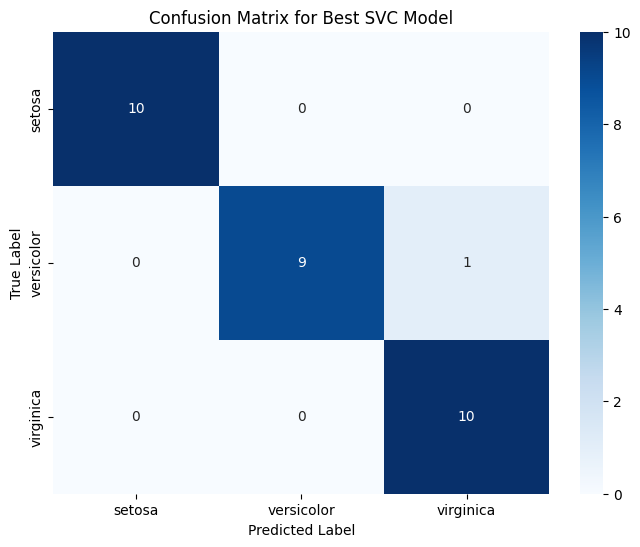


--- Interpreting the Confusion Matrix ---
Rows represent True Labels, Columns represent Predicted Labels.
Diagonal values are correctly classified instances.
Off-diagonal values are misclassifications.

For 'versicolor' (index 1) and 'virginica' (index 2):
  True Versicolor (row 1) predicted as Virginica (col 2): 1
  True Virginica (row 2) predicted as Versicolor (col 1): 0


In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n--- Step 4.1: Confusion Matrix for Best SVC Model ---")

cm = confusion_matrix(y_test, y_pred_best_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best SVC Model')
plt.show()

print("\n--- Interpreting the Confusion Matrix ---")
print("Rows represent True Labels, Columns represent Predicted Labels.")
print("Diagonal values are correctly classified instances.")
print("Off-diagonal values are misclassifications.")
print(f"\nFor 'versicolor' (index 1) and 'virginica' (index 2):")
print(f"  True Versicolor (row 1) predicted as Virginica (col 2): {cm[1, 2]}")
print(f"  True Virginica (row 2) predicted as Versicolor (col 1): {cm[2, 1]}")